# Fonte e sumidouro

A circulação do fluido é dada por:

$$\Gamma = \oint \bold{v} \cdot d\vec{l}$$

Pelo teorema de Stokes, temos que a integral de linha da velocidade pelo contorno é igual ao rotacional da velocidade que passa pela superfície definida por esse contorno, $\omega = \nabla \times \bold{v}$:

$$\oint \bold{v} \cdot d\vec{l} = \int \int_S \omega \cdot \vec{n}\ ds $$



Para um fluido com vorticidade zero (fluido irrotacional), então a circulação através desse contorno será zero. Assim, definindo dois pontos, A e B, quaisquer sobre essa curva, temos:

$$\int_A ^B \vec{v} \cdot d\vec{l} + \int_B ^A \vec{v} \cdot d\vec{l} = 0 \longrightarrow  \int_A ^B \vec{v} \cdot d\vec{l} = \int_A ^B u\ dx + v\ dy + w\ dz$$


Definindo $\phi$ como o campo potencial da velocidade, temos:

$$ u = \frac{\partial \phi}{\partial x},\ v = \frac{\partial \phi}{\partial y},\  w = \frac{\partial \phi}{\partial z}$$

ou,

$$ \bold{v} = \nabla \phi $$


Se aplicarmos a equação de continuidade para fluido incompressível ($\nabla \bold{v} = 0$), chegamos a equação de governo para o potencial:

$$\nabla ^2 \phi = 0$$

## Em meio computacionais

Vamos expressar o campo de velocidades de uma \bold{fonte} e um \bold{sumidouro}, duas soluçÕes para o campo potencial do fluido, em dois plots para visualização.

Primeiro iremos importar as bibliotecas em python utilizadas para o projeto:

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

O objetivo será visualizar as linhas de corrente correspondentes à uma fonte e um sumidouro. Para isso, primeiro precisamos definir a região de observação.

Vamos definir um espação 4x2 no espaço cartesiano $\bold{x}\ ,\ \bold{y}\ \in\ [-2,2],[-1,1]$ e criar uma malha de pontos nele. 

In [2]:
n_points = 50 #número de pontos em cada direção no espaço
x_start, x_end = -2.0,2.0
y_start, y_end = -1.0,1.0
x = np.linspace(x_start, x_end, n_points)
y = np.linspace(y_start, y_end, n_points)

print('x = ', x)
print('y = ', y)

X, Y = np.meshgrid(x,y)

x =  [-2.         -1.91836735 -1.83673469 -1.75510204 -1.67346939 -1.59183673
 -1.51020408 -1.42857143 -1.34693878 -1.26530612 -1.18367347 -1.10204082
 -1.02040816 -0.93877551 -0.85714286 -0.7755102  -0.69387755 -0.6122449
 -0.53061224 -0.44897959 -0.36734694 -0.28571429 -0.20408163 -0.12244898
 -0.04081633  0.04081633  0.12244898  0.20408163  0.28571429  0.36734694
  0.44897959  0.53061224  0.6122449   0.69387755  0.7755102   0.85714286
  0.93877551  1.02040816  1.10204082  1.18367347  1.26530612  1.34693878
  1.42857143  1.51020408  1.59183673  1.67346939  1.75510204  1.83673469
  1.91836735  2.        ]
y =  [-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816  0.02040816  0.06122449  0.10204082  0.14285714  0.18367347
  0.2244898   0.

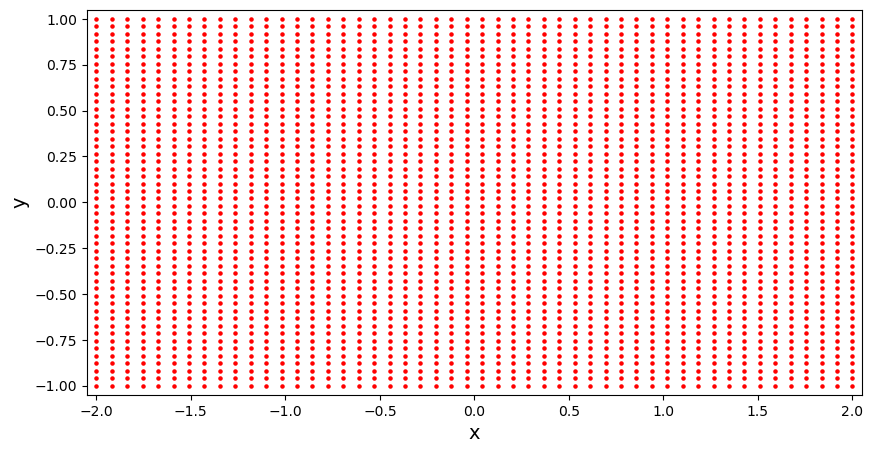

In [3]:
%matplotlib inline

width = 10.0
height = (y_end - y_start)/(x_end - x_start) * width

plt.figure(figsize = (width,height))
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.xlim(x_start-0.05, x_end+0.05)
plt.ylim(y_start-0.05, y_end+0.05)
plt.scatter(X,Y, s=5, color = 'red', marker = 'o')

### Fluxo de Fonte 

Uma fonte é uma singularidade pontual, da qual um fluido escoa para fora, uniformemente em todas as direções. Assim, as linhas de corrente escoam para longe desse ponto em linhas retas e a velocidade  diminui no sentido radial.

Dada a simetria radial do problema, é conveniente utilizar as coordenadas cilindricas $\bold{(r,\theta)}$, sendo $\bold{\theta = tan^{-1}(y/x)}$. As componentes da velocidade ficam:

$$ u_r(r,\theta) = \frac{\sigma}{2\pi r},\ \ u_\theta(r,\theta) = 0) $$


Onde $\sigma$ é a intensidade da fonte. Para conseguirmos a distribuição do campo de velocidades radiais, é aplicada a condição de fluido irrotacional ($\omega = 0$), em coordenadas cilindricas, e a equação da continuidade.

$$ \frac{1}{r}\frac{\partial \psi}{\partial \theta} = u_r\ ,\ -\frac{\partial \psi}{\partial r} = u_\theta $$

Para a função corrente temos:

$$ \psi = \frac{\sigma}{2\pi}\theta + cte $$

E para as velocidades:

$$ u =  \frac{\partial \psi}{\partial y} = \frac{\sigma}{2\pi}\frac{x-x_{fonte}}{(x-x_{fonte})^2 + (y-y_{fonte})^2} $$

$$ v =  -\frac{\partial \psi}{\partial x} = \frac{\sigma}{2\pi}\frac{y-y_{fonte}}{(x-x_{fonte})^2 + (y-y_{fonte})^2} $$



Vamos calcular uma fonte posicionada na coordenada $\bold{(0,0)}$, para isso iremos computar $u_{fonte}$ e $v_{fonte}$ usando operadores aritméticos em vetores utilizando a biblioteca numpy.

In [4]:
forca_fonte = 5.0 #força da fonte
x_fonte, y_fonte = 0.0, 0.0

#Calculando o campo de velocidades na malha
u_fonte = (forca_fonte/(2*math.pi)*(X-x_fonte)/((X-x_fonte)**2+(Y-y_fonte)**2))
v_fonte = (forca_fonte/(2*math.pi)*(Y-y_fonte)/((X-x_fonte)**2+(Y-y_fonte)**2))


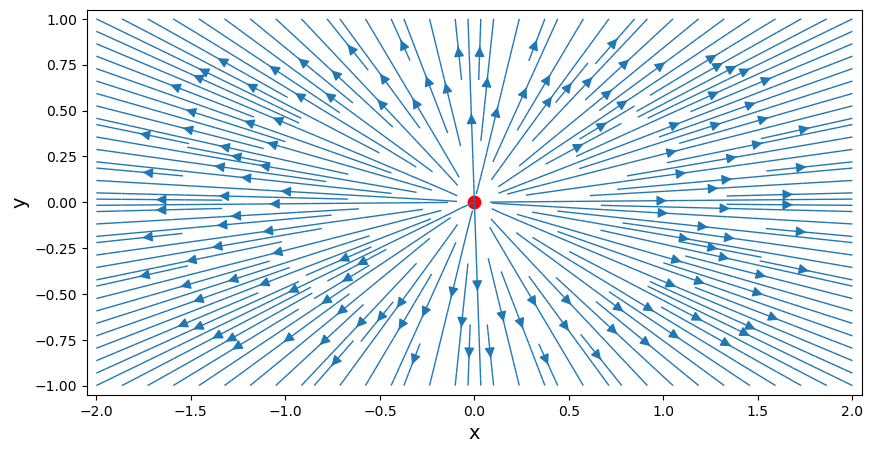

In [5]:
#plotando as linhas de corrente
width = 10.0
height = (y_end - y_start)/(x_end - x_start) * width

plt.figure(figsize = (width,height))
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.xlim(x_start-0.05, x_end+0.05)
plt.ylim(y_start-0.05, y_end+0.05)

plt.streamplot(X,Y,u_fonte,v_fonte,
               density = 2, linewidth=1, arrowsize=1.5, arrowstyle='-|>')
plt.scatter(x_fonte, y_fonte, color = 'red', s = 80, marker='o')

### Fluxo de Sumidouro

Para o sumidouro, somente precisamos alterar a intensidade da fonte para um valor negativo.

In [6]:
forca_sumidouro = -5.0 #força da fonte
x_sumidouro, y_sumidouro = 0.0, 0.0

#Calculando o campo de velocidades na malha
u_sumidouro = (forca_sumidouro/(2*math.pi)*(X-x_sumidouro)/((X-x_sumidouro)**2+(Y-y_sumidouro)**2))
v_sumidouro = (forca_sumidouro/(2*math.pi)*(Y-y_sumidouro)/((X-x_sumidouro)**2+(Y-y_sumidouro)**2))

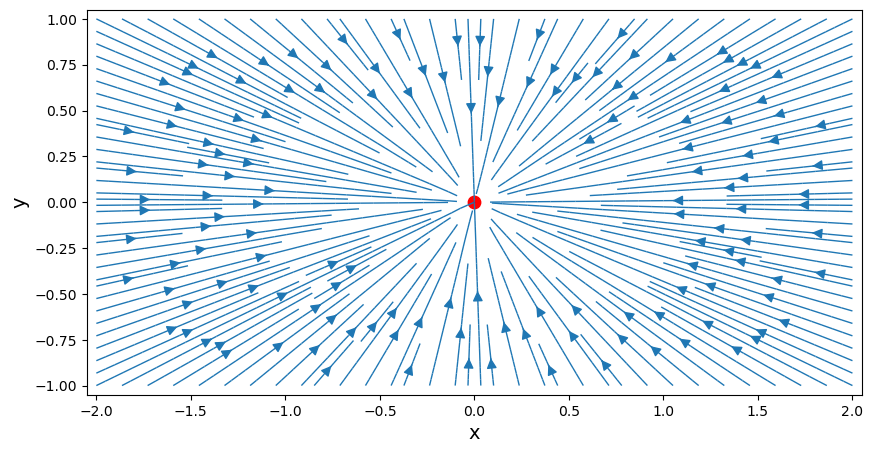

In [7]:
#plotando as linhas de corrente
width = 10.0
height = (y_end - y_start)/(x_end - x_start) * width

plt.figure(figsize = (width,height))
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.xlim(x_start-0.05, x_end+0.05)
plt.ylim(y_start-0.05, y_end+0.05)

plt.streamplot(X,Y,u_sumidouro,v_sumidouro,
               density = 2, linewidth=1, arrowsize=1.5, arrowstyle='-|>')
plt.scatter(x_sumidouro, y_sumidouro, color = 'red', s = 80, marker='o')

### Fluxo de Dipolo

Um dipolo é formado por um par de fonte e sumidouro. Colocando a fonte em $\bold{(-1,0)}$ e o sumidouro $\bold{(1,0)}$, temos um dipolo.

In [10]:
forca_fonte = 5.0 #força da fonte
x_fonte, y_fonte = -1.0, 0.0

#Calculando o campo de velocidades na malha
u_fonte = (forca_fonte/(2*math.pi)*(X-x_fonte)/((X-x_fonte)**2+(Y-y_fonte)**2))
v_fonte = (forca_fonte/(2*math.pi)*(Y-y_fonte)/((X-x_fonte)**2+(Y-y_fonte)**2))

forca_sumidouro = -5.0 #força da fonte
x_sumidouro, y_sumidouro = 1.0, 0.0

#Calculando o campo de velocidades na malha
u_sumidouro = (forca_sumidouro/(2*math.pi)*(X-x_sumidouro)/((X-x_sumidouro)**2+(Y-y_sumidouro)**2))
v_sumidouro = (forca_sumidouro/(2*math.pi)*(Y-y_sumidouro)/((X-x_sumidouro)**2+(Y-y_sumidouro)**2))

In [11]:
# compute the velocity of the pair source/sink by superposition
u_dipolo = u_fonte + u_sumidouro
v_dipolo = v_fonte + v_sumidouro

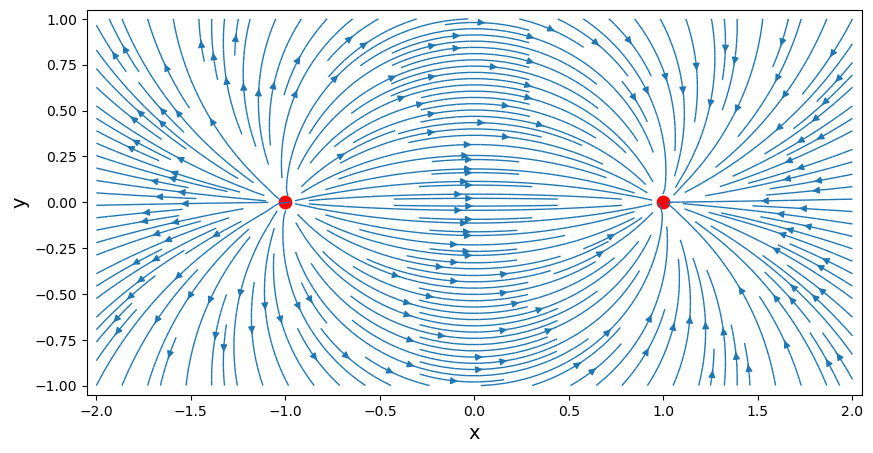

In [ ]:
#plotando as linhas de corrente
width = 10.0
height = (y_end - y_start)/(x_end - x_start) * width

plt.figure(figsize = (width,height))
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.xlim(x_start-0.05, x_end+0.05)
plt.ylim(y_start-0.05, y_end+0.05)

plt.streamplot(X,Y,u_dipolo,v_dipolo,
               density = 2, linewidth=1, arrowsize=1, arrowstyle='-|>')
plt.scatter([x_fonte,x_sumidouro], [y_fonte,y_sumidouro], color = 'red', s = 80, marker='o')